In [160]:
%cd '/Users/eivndlarsen/Deep learning/054307---ARTIFICIAL-NEURAL-NETWORKS-AND-DEEP-LEARNING-/'

/Users/eivndlarsen/Deep learning/054307---ARTIFICIAL-NEURAL-NETWORKS-AND-DEEP-LEARNING-


In [161]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# # ****Unzip****

In [162]:
!unzip training.zip

Archive:  training.zip
   creating: training/
   creating: training/Apple/
  inflating: __MACOSX/training/._Apple  
   creating: training/Blueberry/
  inflating: __MACOSX/training/._Blueberry  
   creating: training/Strawberry/
  inflating: __MACOSX/training/._Strawberry  
   creating: training/Soybean/
  inflating: __MACOSX/training/._Soybean  
   creating: training/Squash/
  inflating: __MACOSX/training/._Squash  
   creating: training/Potato/
  inflating: __MACOSX/training/._Potato  
   creating: training/Raspberry/
  inflating: __MACOSX/training/._Raspberry  
   creating: training/Cherry/
  inflating: __MACOSX/training/._Cherry  
   creating: training/Corn/
  inflating: __MACOSX/training/._Corn  
   creating: training/Grape/
  inflating: __MACOSX/training/._Grape  
   creating: training/Pepper/
  inflating: __MACOSX/training/._Pepper  
   creating: training/Tomato/
  inflating: __MACOSX/training/._Tomato  
   creating: training/Orange/
  inflating: __MACOSX/training/._Orange  
   c

# # ****Start****

In [ ]:
dataset_dir = 'training'

In [ ]:
train_samples, validation_samples = train_test_split(dataset_dir, test_size =0.2)
train_samples

['i', 't', 'n', 'a', 'g', 'n']

StopIteration: 

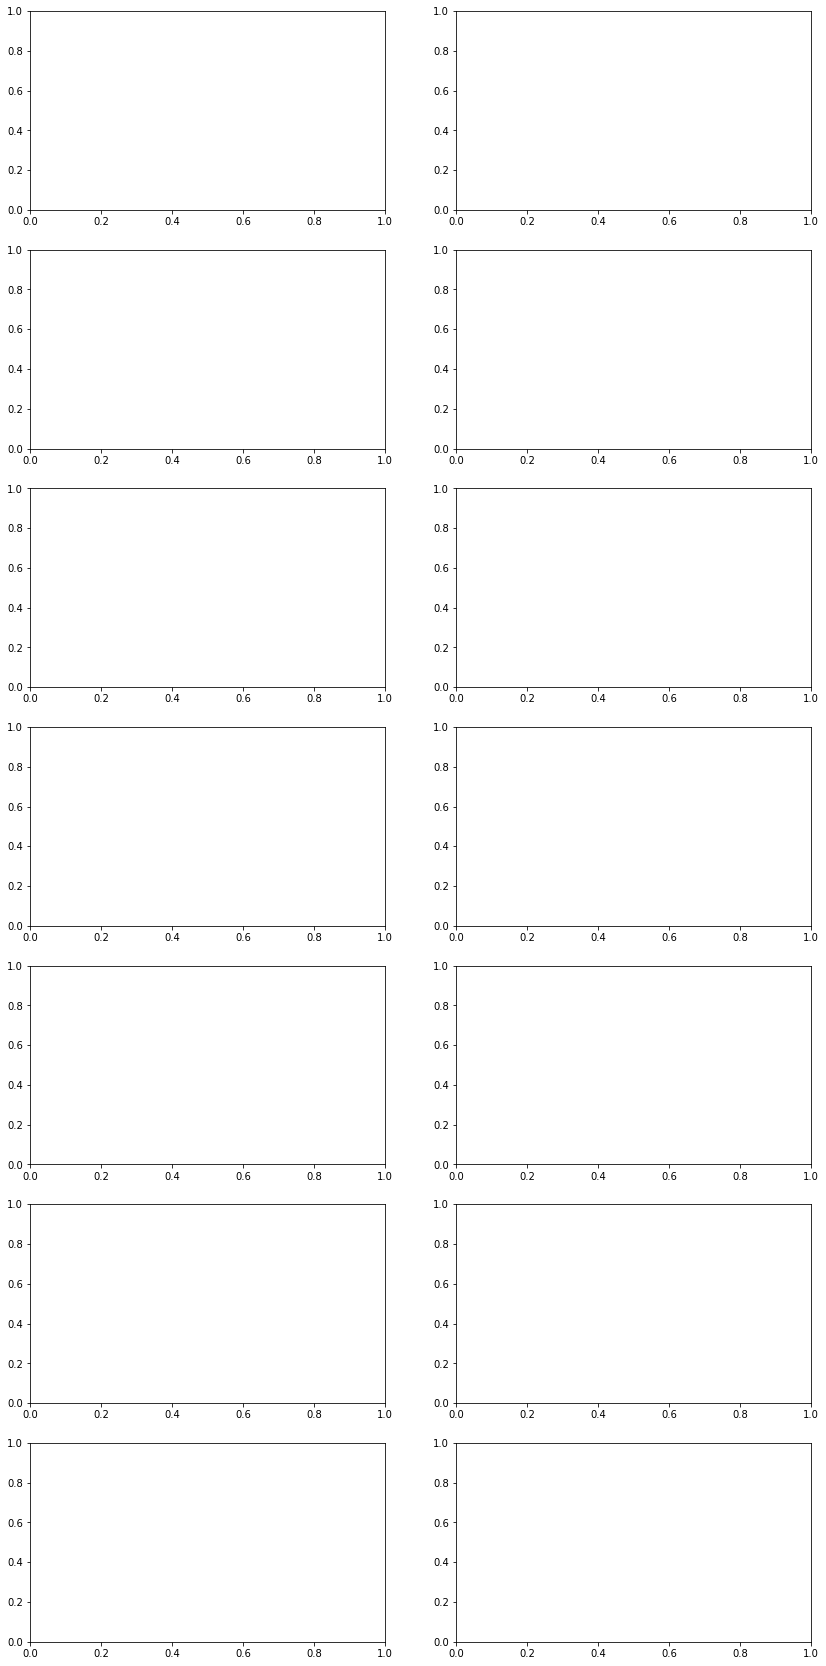

In [ ]:
# Plot example images from dataset
labels = ['Apple','Blueberry','Cherry','Corn','Grape','Orange','Peach','Pepper','Potato','Raspberry','Soybean','Squash','Strawberry','Tomato']

num_row = len(labels)//2
num_col = len(labels)//num_row
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,15*num_col))
for i in range(len(labels)):
  if i < len(labels):
    class_imgs = next(os.walk('{}/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

Let the game begin

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

# Download and import visualkeras library
#!pip3 install visualkeras
import visualkeras



1.14.0


In [ ]:
seed=42
random.seed(seed)
np.random.seed(seed)
tf.random.set_random_seed(seed)

In [ ]:
#labels = {0:'Apple', 1:'Blueberry', 2:'Cherry', 3:'Corn', 4:'Grape', 5:'Orange', 6:'Peach', 7:'Pepper', 8:'Potato', 9:'Raspberry', 10:'Soybean', 11:'Squash', 12:'Strawberry', 13:'Tomato'}

dataset_dir  ='/Users/eivndlarsen/Deep learning/054307---ARTIFICIAL-NEURAL-NETWORKS-AND-DEEP-LEARNING-/'
#img_data_gen = tf.keras.preprocessing.image.ImageDataGenerator()
#in_data = img_data_gen.flow_from_directory(directory=dataset_dir)


In [ ]:
labels = ['Apple','Blueberry','Cherry','Corn','Grape','Orange','Peach','Pepper','Potato','Raspberry','Soybean','Squash','Strawberry','Tomato']

datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. /255,
    validation_split=0.2,
    rotation_range=0,
    height_shift_range= 50,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_val = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. /255,
    validation_split = 0.2
)

train_gen = datagen_train.flow_from_directory(
    dataset_dir,
    seed=seed,
    target_size=(256,256),
    shuffle = True,
    subset='training'
)

val_gen = datagen_val.flow_from_directory(
    dataset_dir,
    seed=seed,
    target_size=(256,256),
    shuffle = True,
    subset='validation'
)

Found 14189 images belonging to 14 classes.
Found 3539 images belonging to 14 classes.


In [ ]:
train_gen

In [ ]:
X_train, y_train = next(train_gen)

train_gen.open()


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7feb79b92d10>

In [ ]:

# Split in train and test
X_train, X_val, y_train, y_val = train_test_split(train_gen, val_gen, random_state=seed, test_size=.1, stratify=val_gen)
X_train.shape, y_train.shape, X_val.shape, y_val.shape



ValueError: Found input variables with inconsistent numbers of samples: [444, 111]

In [ ]:
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.uint8(image))

  return batch

In [ ]:
# Get a sample from dataset and show info
_ = get_next_batch(train_gen)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7feb79b8edd0>